In [24]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
import os

In [31]:


diretorio = f'data/test/'

imagens = []
resposta = []

#percorre cada arquivo do diretorio
for root, dirs, files in os.walk(diretorio):
    for arquivo in files:
        img_path = os.path.join(root, arquivo)

        img = image.load_img(img_path, target_size=(60, 60))  
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalização da imagem
        imagens.append(img_array)
        resposta.append(root.split('/')[-1])

diretorio = f'data/train/'
for root, dirs, files in os.walk(diretorio):
    for arquivo in files:
        img_path = os.path.join(root, arquivo)

        img = image.load_img(img_path, target_size=(60, 60)) 
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalização da imagem
        imagens.append(img_array)
        resposta.append(root.split('/')[-1])

In [32]:
df = pd.DataFrame({'imagem':imagens, 'classe' : resposta})
df.head()

,imagem,classe
0,"[[[[0.09019608 0.09411765 0.17254902], [0.0862...",agua
1,"[[[[0.12941177 0.14509805 0.19215687], [0.1294...",agua
2,"[[[[0.32941177 0.3137255 0.2784314 ], [0.3215...",area_preservacao
3,"[[[[0.08235294 0.15686275 0.13333334], [0.0823...",area_preservacao
4,"[[[[0.02352941 0.05882353 0.04705882], [0.0549...",area_preservacao


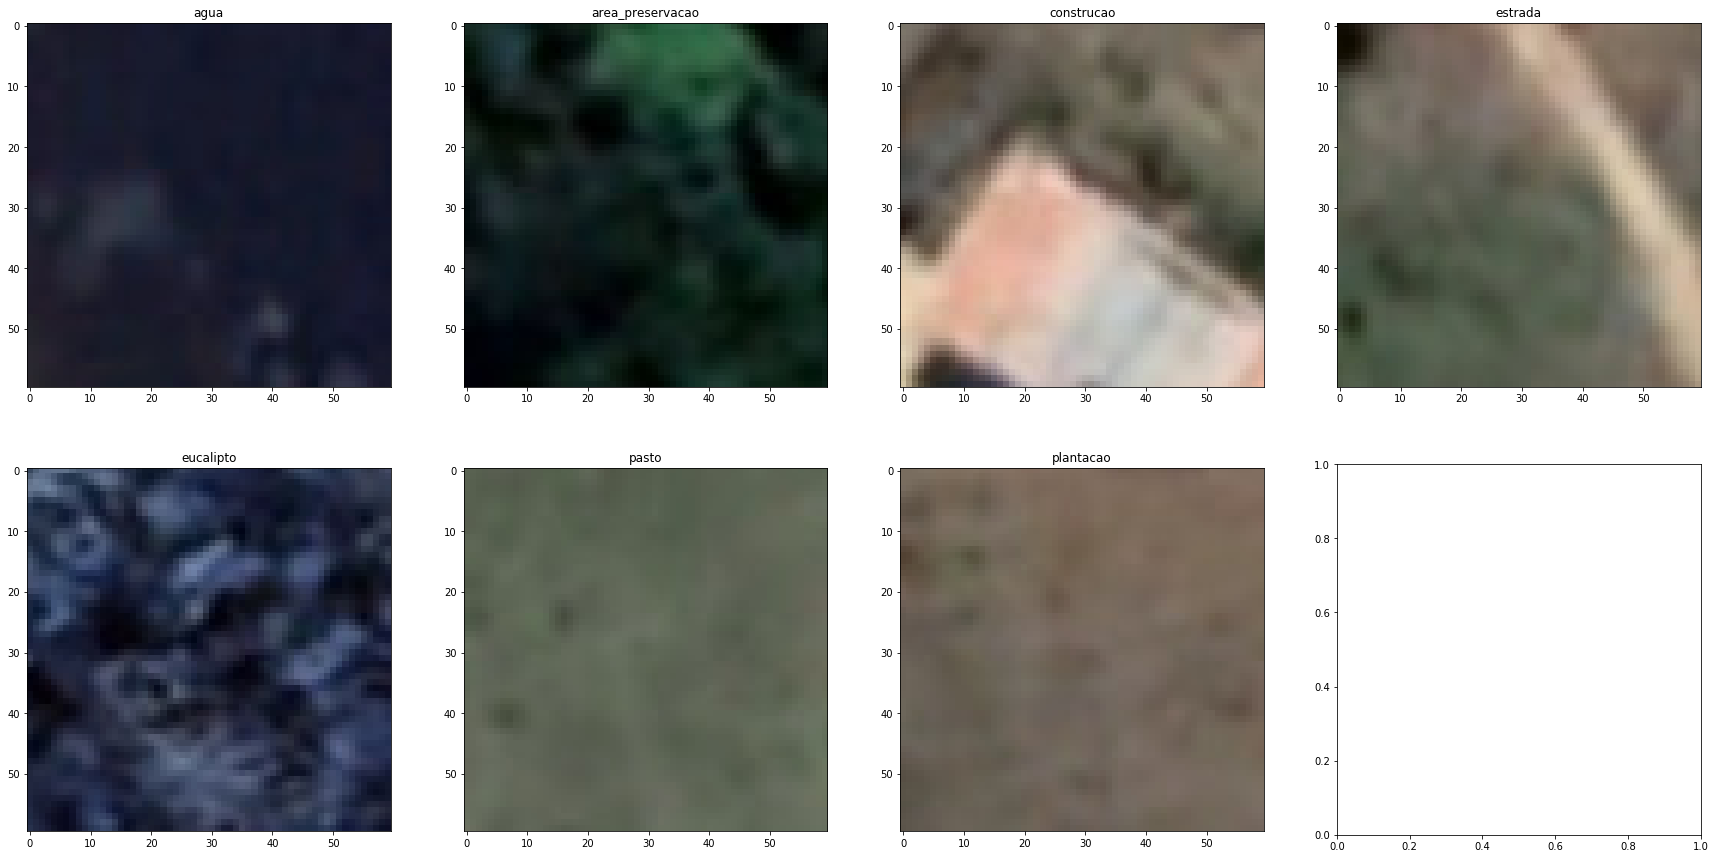

In [53]:
# visualizando cada categoria
classes = ['agua', 'area_preservacao', 'construcao', 'estrada', 'eucalipto', 'pasto', 'plantacao']  # Lista das classes em ordem

fig, axes = plt.subplots(2, 4, figsize=(30, 15))
c = 0
for i in range(len(axes)):
    for j in range(len(axes[0])):
        axes[i][j].imshow(df[df['classe'] == classes[c] ]['imagem'].iloc[1][0], cmap='gray')
        axes[i][j].set_title(classes[c])
        c+=1
        if c == 7:
            break
plt.show()

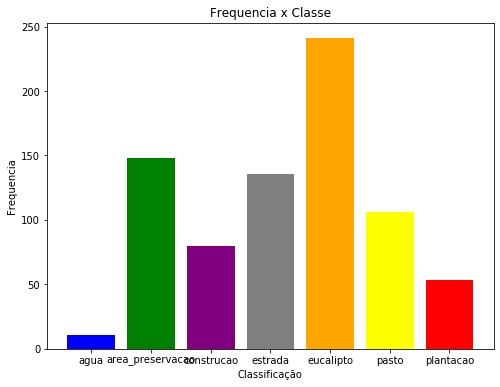

In [30]:
agrupado = df.groupby('classe')['media_r'].count().reset_index()
plt.figure(figsize=(8, 6))  

cores = [ "blue",
    "green",
    "purple",
    "gray",
    "orange",
    "yellow",
    "red"]

for i, categoria in enumerate(agrupado['classe']):
    plt.bar(categoria, agrupado['media_r'][i], color=cores[i])

plt.xlabel('Classificação')
plt.ylabel('Frequencia')
plt.title('Frequencia x Classe')

plt.show()

In [26]:
df['classe'].describe()

count           775
unique            7
top       eucalipto
freq            241
Name: classe, dtype: object

In [54]:
def get_img_stats(img):
    canal_r = img[:, :, 0]
    canal_g = img[:, :, 1]
    canal_b = img[:, :, 2]

    media_r = np.mean(canal_r)
    media_g = np.mean(canal_g)
    media_b = np.mean(canal_b)

    mediana_r = np.median(canal_r)
    mediana_g = np.median(canal_g)
    mediana_b = np.median(canal_b)

    desvio_padrao_r = np.std(canal_r)
    desvio_padrao_g = np.std(canal_g)
    desvio_padrao_b = np.std(canal_b)

    maximo_r = np.max(canal_r)
    maximo_g = np.max(canal_g)
    maximo_b = np.max(canal_b)

    minimo_r = np.min(canal_r)
    minimo_g = np.min(canal_g)
    minimo_b = np.min(canal_b)

    return  media_r ,media_g ,media_b ,mediana_r ,mediana_g ,mediana_b ,desvio_padrao_r ,desvio_padrao_g ,desvio_padrao_b ,maximo_r ,maximo_g ,maximo_b ,minimo_r ,minimo_g ,minimo_b

In [55]:
var_stat = [ 'media_r' ,
            'media_g' ,
            'media_b' ,
            'mediana_r' ,
            'mediana_g' ,
            'mediana_b' ,
            'desvio_padrao_r' ,
            'desvio_padrao_g' ,
            'desvio_padrao_b' ,
            'maximo_r' ,
            'maximo_g' ,
            'maximo_b' ,
            'minimo_r' ,
            'minimo_g' ,
            'minimo_b'
]
df['stats'] = df['imagem'].apply(get_img_stats)
for i in range(len(var_stat)):
    df[var_stat[i]] = df['stats'].apply(lambda x: x[i])

In [56]:
#deixar Dataframe mais leve para manipulação
df = df[var_stat + ['classe']].copy()

In [57]:
df.head()

,media_r,media_g,media_b,mediana_r,mediana_g,mediana_b,desvio_padrao_r,desvio_padrao_g,desvio_padrao_b,maximo_r,maximo_g,maximo_b,minimo_r,minimo_g,minimo_b,classe
0,0.115033,0.115425,0.116906,0.094118,0.094118,0.094118,0.037726,0.038122,0.038876,0.184314,0.188235,0.196078,0.062745,0.054902,0.054902,agua
1,0.139041,0.139956,0.140632,0.133333,0.137255,0.133333,0.030685,0.030551,0.032165,0.196078,0.215686,0.235294,0.086275,0.094118,0.094118,agua
2,0.148388,0.153726,0.159651,0.121569,0.135294,0.147059,0.109154,0.106279,0.098749,0.415686,0.411765,0.400000,0.000000,0.000000,0.000000,area_preservacao
3,0.059760,0.058562,0.064009,0.047059,0.052941,0.062745,0.046383,0.043509,0.046062,0.172549,0.164706,0.176471,0.000000,0.000000,0.000000,area_preservacao
4,0.130741,0.129608,0.127800,0.125490,0.125490,0.127451,0.070917,0.067586,0.065064,0.305882,0.325490,0.317647,0.000000,0.007843,0.000000,area_preservacao


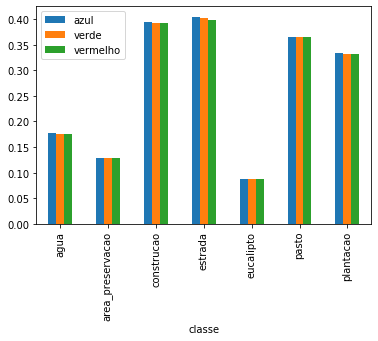

In [66]:
pd.pivot_table(df,
                index = 'classe',
                values = ['media_r',	'media_g',	'media_b'],
                aggfunc = [np.mean]).plot(kind = 'bar')
plt.legend(['azul', 'verde', 'vermelho'])

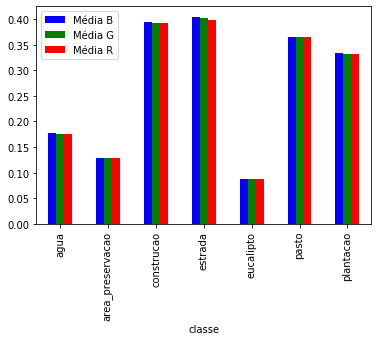

In [90]:
m = pd.pivot_table(df
                             , index='classe'
                             , values=['media_r', 'media_g', 'media_b']
                             , aggfunc=[np.mean])

# Defina as cores desejadas para cada canal
cores = {'media_r': 'red', 'media_g': 'green', 'media_b': 'blue'}

m.columns = ['media_b', 'media_g', 'media_r']
# Plote o gráfico de barras usando as cores definidas
ax = m.plot(kind='bar', color=['blue', 'green', 'red'])


legend_labels = ['Média B', 'Média G', 'Média R']
plt.legend(legend_labels)

plt.show()

---------------------------------------agua--------------------------------------------------


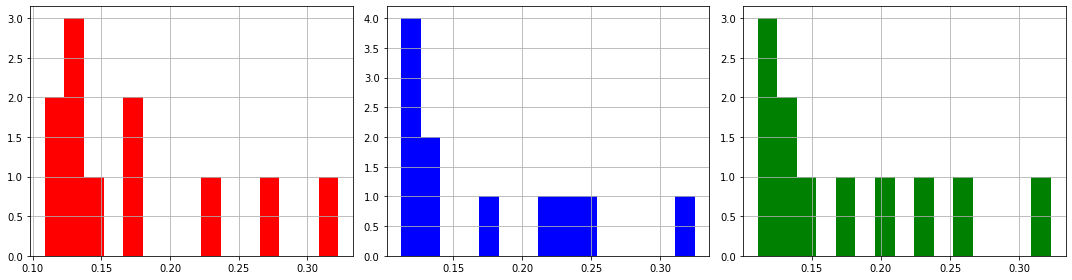

---------------------------------------area_preservacao--------------------------------------------------


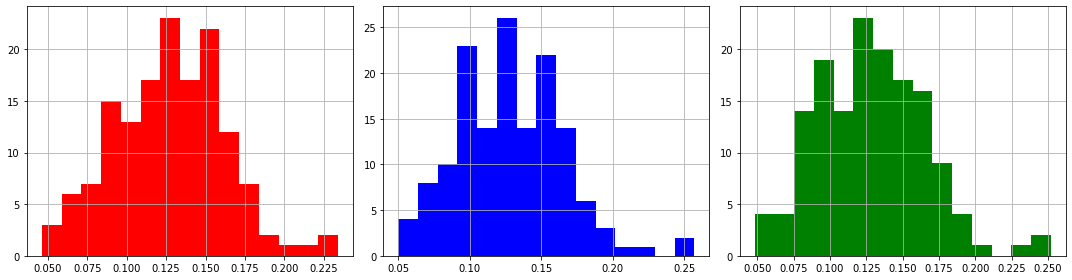

---------------------------------------construcao--------------------------------------------------


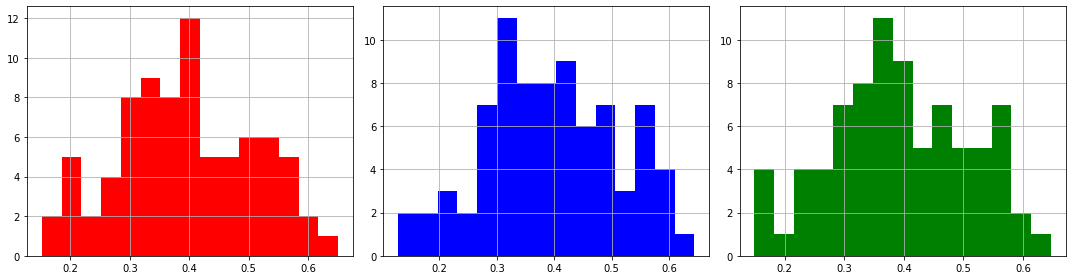

---------------------------------------estrada--------------------------------------------------


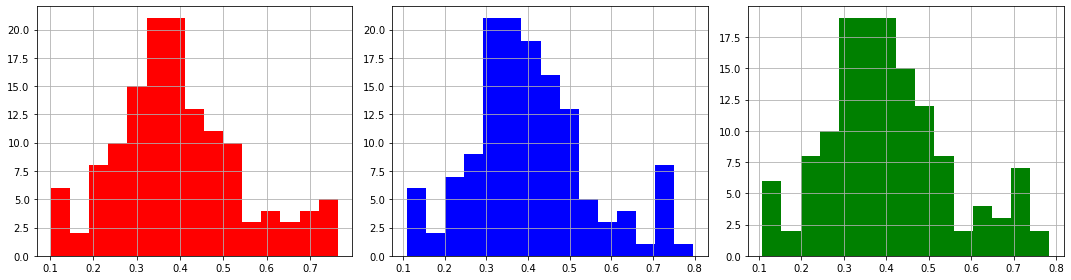

---------------------------------------eucalipto--------------------------------------------------


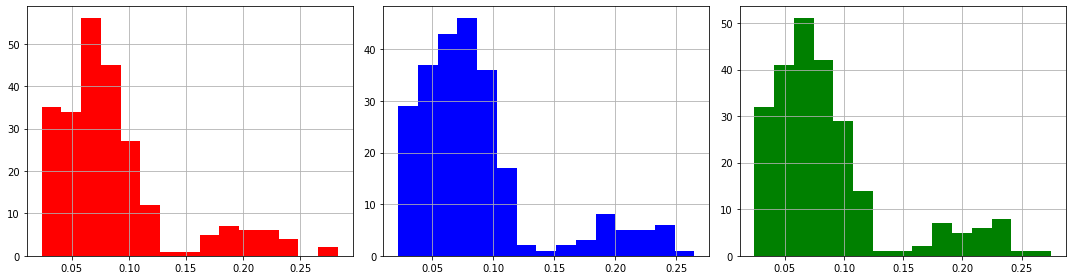

---------------------------------------pasto--------------------------------------------------


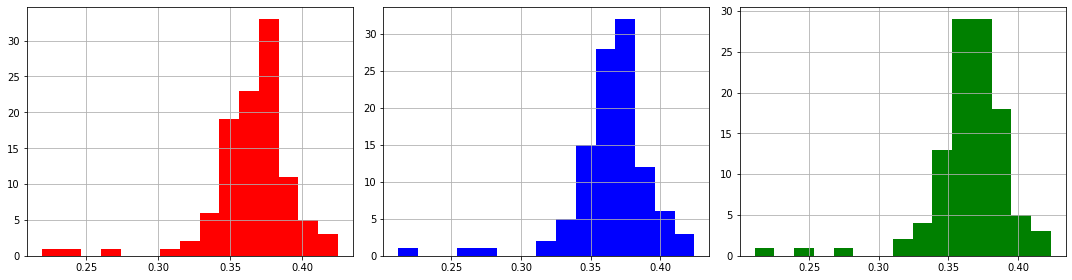

---------------------------------------plantacao--------------------------------------------------


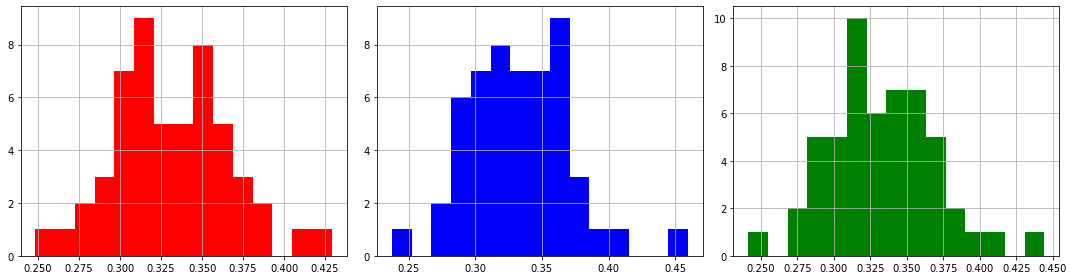

In [86]:
# Histogramas das medias de cada classe
for classe in classes:
    print(f'---------------------------------------{classe}--------------------------------------------------')
    fig.suptitle(classe)
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    df[df['classe'] == classe]['media_r'].hist(bins = 15, color = 'red', ax = axes[0])
    
    df[df['classe'] == classe]['media_b'].hist(bins = 15, color = 'blue', ax = axes[1])
    
    df[df['classe'] == classe]['media_g'].hist(bins = 15, color = 'green', ax = axes[2])
    plt.tight_layout()
    plt.show()
    

In [88]:
import scipy.stats as stats

def calcular_intervalo_confianca(media, desvio_padrao, tamanho_amostra, confianca):
    # Calcula o valor crítico (Z-score) com base no nível de confiança
    z = stats.norm.ppf(1 - (1 - confianca) / 2)

    # Calcula o erro padrão
    erro_padrao = desvio_padrao / (tamanho_amostra ** 0.5)

    # Calcula o intervalo de confiança
    intervalo_superior = media + (z * erro_padrao)
    intervalo_inferior = media - (z * erro_padrao)

    return intervalo_inferior, intervalo_superior


# Exemplo de uso da função
media = 50.0
desvio_padrao = 10.0
tamanho_amostra = 100
confianca = 0.95
intervalo = calcular_intervalo_confianca(media, desvio_padrao, tamanho_amostra, confianca)
print(f"Intervalo de Confiança ({confianca * 100}%): {intervalo}")

Intervalo de Confiança (95.0%): (48.04003601545995, 51.95996398454005)


In [100]:


media_desvio = pd.pivot_table(df
                             , index='classe'
                             , values=['media_r', 'media_g', 'media_b']
                             , aggfunc=[np.mean, np.std, len])

media_desvio.columns = ['media_b','media_g','media_r','std_b','std_g','std_r', 'tamanho_amostra','_', '_']
media_desvio

,media_b,media_g,media_r,std_b,std_g,std_r,tamanho_amostra,_,_
classe,,,,,,,,,
agua,0.176984,0.175591,0.175494,0.070072,0.068870,0.070344,11,11,11
area_preservacao,0.128841,0.128443,0.127968,0.037244,0.036823,0.035400,148,148,148
construcao,0.393961,0.393236,0.392510,0.116630,0.115494,0.114238,80,80,80
estrada,0.405084,0.402126,0.398725,0.143944,0.145261,0.146253,136,136,136
eucalipto,0.086494,0.086912,0.087348,0.052250,0.052426,0.052503,241,241,241
pasto,0.365017,0.364909,0.364942,0.028456,0.029117,0.029386,106,106,106
plantacao,0.333009,0.332586,0.331567,0.037778,0.036794,0.035337,53,53,53


In [117]:
confianca = 0.99999
classe = 'eucalipto'
for classe in classes:
    n     = media_desvio['tamanho_amostra'].loc[classe]

    media_b = media_desvio['media_b'].loc[classe]
    std_b   = media_desvio['std_b'].loc[classe]
    i_b = calcular_intervalo_confianca(media_b, std_b, n, confianca)

    media_r = media_desvio['media_r'].loc[classe]
    std_r   = media_desvio['std_r'].loc[classe]
    i_r = calcular_intervalo_confianca(media_r, std_r, n, confianca)

    media_g = media_desvio['media_g'].loc[classe]
    std_g   = media_desvio['std_g'].loc[classe]
    i_g = calcular_intervalo_confianca(media_b, std_b, n, confianca)

    df[f'fl_{classe}'] = np.where(((df['media_b'] > i_b[0]) & (df['media_b'] < i_b[1])) 
            & ((df['media_r'] > i_r[0]) & (df['media_r'] < i_r[1])) 
            & ((df['media_g'] > i_g[0]) & (df['media_g'] < i_g[1])), 1, 0)

    display(pd.pivot_table(df,
                    index = 'classe',
                    columns = f'fl_{classe}',
                    values = 'media_g',
                    aggfunc = len))

fl_agua,0,1
classe,,
agua,2,9
area_preservacao,19,129
construcao,71,9
estrada,115,21
eucalipto,158,83
pasto,104,2
plantacao,52,1


fl_area_preservacao,0,1
classe,,
agua,8.0,3.0
area_preservacao,121.0,27.0
construcao,80.0,NaN
estrada,135.0,1.0
eucalipto,238.0,3.0
pasto,106.0,NaN
plantacao,53.0,NaN


fl_construcao,0,1
classe,,
agua,11.0,NaN
area_preservacao,148.0,NaN
construcao,55.0,25.0
estrada,93.0,43.0
eucalipto,241.0,NaN
pasto,9.0,97.0
plantacao,33.0,20.0


fl_estrada,0,1
classe,,
agua,11.0,NaN
area_preservacao,148.0,NaN
construcao,59.0,21.0
estrada,96.0,40.0
eucalipto,241.0,NaN
pasto,22.0,84.0
plantacao,38.0,15.0


fl_eucalipto,0,1
classe,,
agua,11.0,NaN
area_preservacao,128.0,20.0
construcao,80.0,NaN
estrada,136.0,NaN
eucalipto,189.0,52.0
pasto,106.0,NaN
plantacao,53.0,NaN


fl_pasto,0,1
classe,,
agua,11.0,NaN
area_preservacao,148.0,NaN
construcao,78.0,2.0
estrada,130.0,6.0
eucalipto,241.0,NaN
pasto,62.0,44.0
plantacao,45.0,8.0


fl_plantacao,0,1
classe,,
agua,10.0,1.0
area_preservacao,148.0,NaN
construcao,68.0,12.0
estrada,126.0,10.0
eucalipto,241.0,NaN
pasto,86.0,20.0
plantacao,37.0,16.0
